# Heart Disease Prediction Using Machine learning

**Data Dictionary**

In [1]:
features = dict(age="Age of the patient in years", origin="place of study", sex="Male/Female", cp="chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])", trestbps="resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))", chol= "serum cholesterol in mg/dl", fbs="if fasting blood sugar > 120 mg/dl", restecg="resting electrocardiographic results -- Values: [normal, stt abnormality, lv hypertrophy]", 
thalach="maximum heart rate achieved", exang="exercise-induced angina (True/ False)", oldpeak="ST depression induced by exercise relative to rest", slope="the slope of the peak exercise ST segment", ca="number of major vessels (0-3) colored by fluoroscopy", thal="[normal; fixed defect; reversible defect]", target="the predicted attribute")

features

{'age': 'Age of the patient in years',
 'origin': 'place of study',
 'sex': 'Male/Female',
 'cp': 'chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])',
 'trestbps': 'resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))',
 'chol': 'serum cholesterol in mg/dl',
 'fbs': 'if fasting blood sugar > 120 mg/dl',
 'restecg': 'resting electrocardiographic results -- Values: [normal, stt abnormality, lv hypertrophy]',
 'thalach': 'maximum heart rate achieved',
 'exang': 'exercise-induced angina (True/ False)',
 'oldpeak': 'ST depression induced by exercise relative to rest',
 'slope': 'the slope of the peak exercise ST segment',
 'ca': 'number of major vessels (0-3) colored by fluoroscopy',
 'thal': '[normal; fixed defect; reversible defect]',
 'target': 'the predicted attribute'}

In [68]:
# EDA and visualisation libs

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.ensemble import RandomForestClassifier as RF

# model eval
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report

## EDA (Exploratory Data Analysis)

In [3]:
df = pd.read_csv("data.csv")
df.shape, len(df)

((303, 14), 303)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


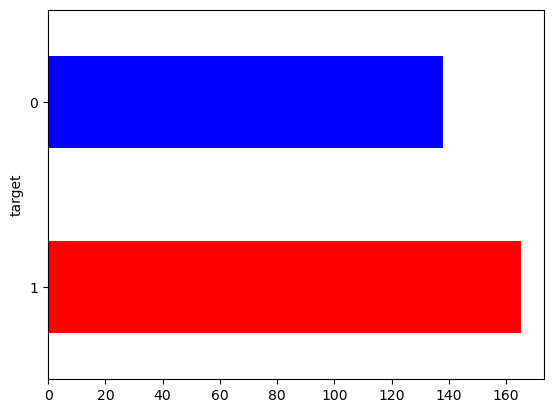

In [6]:
df.target.value_counts().plot.barh(color=("red", "blue"));

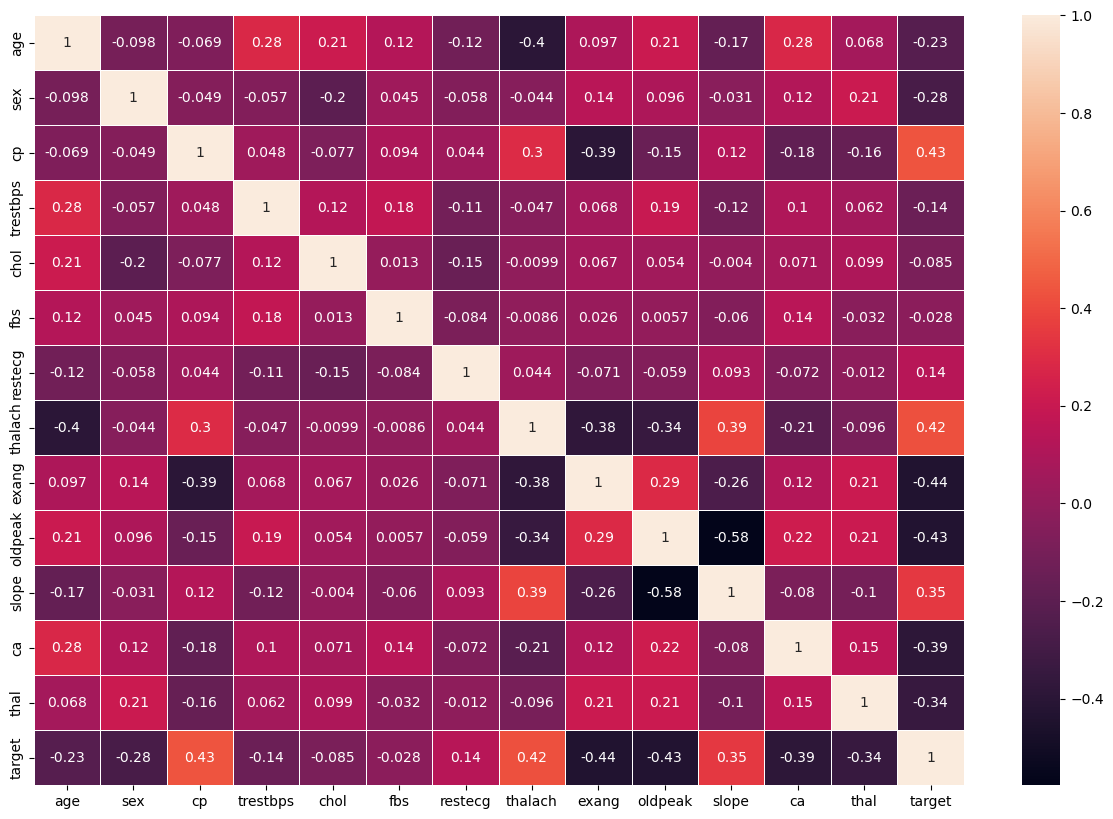

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),
                annot=True,
                linewidths=0.5)

In [25]:
pd.DataFrame(df.corr()).target.sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

## Modelling

In [8]:
X = df.drop("target", axis=1)
y = df.target

In [35]:
np.random.seed(42)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2)
models = {"Logistic" : LR(),
          "KNN" : KN(),
          "Random Forest" : RF()}



In [33]:
def fit_and_score(models:dict, X_train, X_test, y_train, y_test):
    """
    Returns scores for all models after fitting them.
    models: dict() object containing models to evaluate.
    X_train: train data
    X_test: test data
    y_train: train labels
    y_test: test labels
    """
    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return scores

D:\DS_projects\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


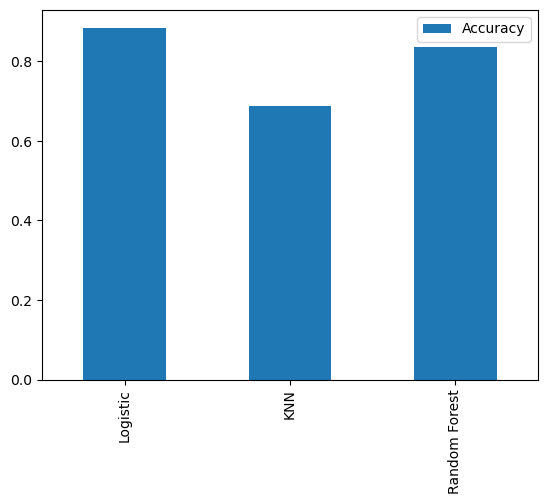

In [44]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores_df = pd.DataFrame(scores, index=["Accuracy"])
scores_df = scores_df.T
scores_df.plot.bar();

## Hyperparameter Tuning

In [53]:
lr_grid = {"C": np.logspace(-4, 4, 20),
           "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [46]:
rs_lr = RandomizedSearchCV(LR(),
                           param_distributions=lr_grid,
                           verbose=True,
                           n_iter=20,
                           cv=5)

In [47]:
rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [50]:
rs_lr.score(X_test, y_test)

0.8852459016393442

In [54]:
rs_rf = RandomizedSearchCV(RF(),
                           param_distributions=rf_grid,
                           verbose=True,
                           cv=5,
                           n_iter=20)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [55]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [56]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

In [57]:
gs_grid = {"C": np.logspace(-4, 4, 30),
           "solver": ["liblinear"]}

gs_lr = GridSearchCV(LR(),
                     param_grid=gs_grid,
                     verbose=True,
                     cv=5)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [58]:
gs_lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
gs_lr.score(X_test, y_test)

0.8852459016393442

## Model Evaluation

### ROC curve and AUC score

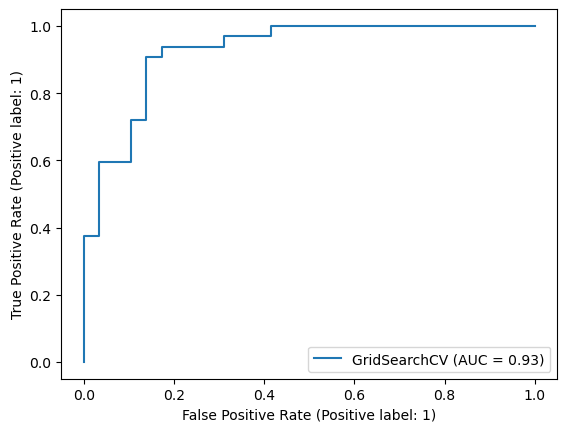

In [60]:
RocCurveDisplay.from_estimator(gs_lr, X_test, y_test);

### Confusion Matrix

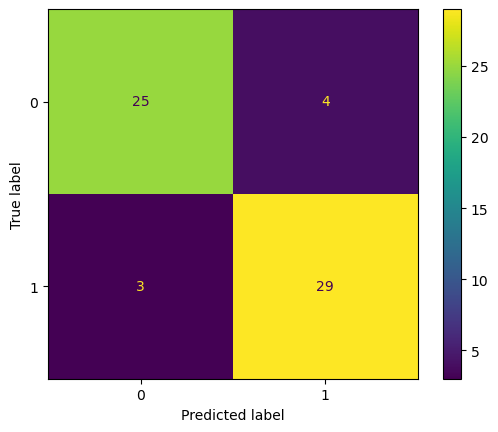

In [61]:
ConfusionMatrixDisplay.from_estimator(gs_lr, X_test, y_test);

### Classification Report

In [66]:
y_preds = gs_lr.predict(X_test)

pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892857,0.878788,0.885246,0.885823,0.885477
recall,0.862069,0.906250,0.885246,0.884159,0.885246
f1-score,0.877193,0.892308,0.885246,0.884750,0.885122
support,29.000000,32.000000,0.885246,61.000000,61.000000


In [69]:
clf = LR(**gs_lr.best_params_)

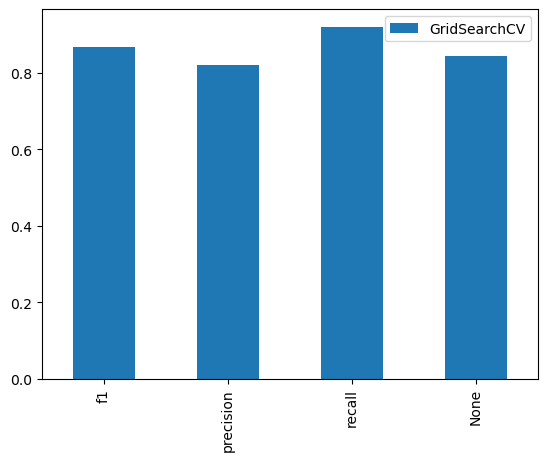

In [78]:
metrics = ["f1", "precision", "recall", None]
cv_metrics = {}

for metric in metrics:
    cv_metrics[metric] = np.mean(cross_val_score(clf, X, y, scoring=metric))

metrics_df = pd.DataFrame(index=cv_metrics.keys(), data=cv_metrics.values(), columns=["GridSearchCV"])
metrics_df.plot.bar();